Copyright (c) 2017 [Geosoft Inc.](geosoft.com)

https://github.com/GeosoftInc/gxpy

[BSD 2-clause License](https://github.com/GeosoftInc/gxpy/blob/master/LICENSE)

# 2D Views and Maps

For this lesson we will start with a residual total magnetic intensity (TMI) data grid for the Wittichica Creek area of British Columbia, Canada. This data was downloaded from the Geoscience Data Portal of the Geoscience Canada using Geosoft Seeker.

The most common requirement for a grid is to present the grid data as a colour image that can be viewed or printed. In this exercise we will first view the grid, then add contours, shading and a colour legend, and finally we will add location annotations and complete the map ready for printing or sharing.

### Lessons

<!---
# Run this from a code cell to create TOC markdown:
import geosoft.gxpy.utility; print(geosoft.gxpy.utility.jupyter_markdown_toc('2d views and maps'))
-->
 1. [Understanding Geosoft Maps and Views](#Understanding-Geosoft-Maps-and-Views)
 2. [Imports, GX Context and get data from GitHub](#Imports,-GX-Context-and-get-data-from-GitHub)
 3. [Display a grid on a map](#Display-a-grid-on-a-map)
 4. [Add Contours and Shading](#Add-Contours-and-Shading)
 5. [Location Reference, Scale Bar, Colour Legend and Title](#Location-Reference,-Scale-Bar,-Colour-Legend-and-Title)
 6. [Display in a Geosoft viewer](#Display-in-a-Geosoft-viewer)

__See also:__ [Tutorial page](https://geosoftgxdev.atlassian.net/wiki/spaces/GXD93/pages/108528042/2D+Views+and+Maps)

> Some map features in this notebook require a Geosoft End-User License.

## Understanding Geosoft Maps and Views

Geosoft maps are used to present geoscience information on a 2D surface, which can be a computer screen or printed on paper.  

* Geosoft Maps are stored in a file that has a descriptive name and an extension .map.
* A Map can be thought of as a physical piece of paper, and we use map centimeters or map millimetres to reference locations relative to the bottom-left corner, which is location (0,0).
* A Map contains Views, and a Map may have any number of Views.
* A View represents some spatial extent within a defined Earth coordinate system that is scaled and located as desired on the surface of the map.
* Views can be 2D or 3D, with 3D views rendered on a map as a 2D perspective of the information in the 3D View..
* Views contain named Groups, with each Group containing a set of graphical elements that display spatial information. Basic drawing Groups contain lines, coloured areas and text.  More advanced Group types support more complex data structures like Aggregates for grids and images, Voxels that display a Geosoft voxette, or a CSymb Group that contains data points coloured by size based on a data value.
* 3D Views can contain 3D Groups, such as a something drawn on a relief surface, or a 3D Geosoft Geosurface, or a set of vectors from a Geosoft Vector voxel.
* Geosoft Maps can be opened and viewed in a Geosoft Viewer.

## Imports, GX Context and get data from GitHub

In [1]:
import geosoft.gxpy.gx as gx
import geosoft.gxpy.view as gxview
import geosoft.gxpy.group as gxgroup
import geosoft.gxpy.agg as gxagg
import geosoft.gxpy.grid as gxgrd
import geosoft.gxpy.viewer as gxviewer
import geosoft.gxpy.utility as gxu
import geosoft.gxpy.map as gxmap
from IPython.display import Image

gxc = gx.GXpy()

url = 'https://github.com/GeosoftInc/gxpy/raw/9.3.1/examples/data/'
gxu.url_retrieve(url + 'Wittichica Creek Residual Total Field.grd')
gxu.url_retrieve(url + 'Wittichica Creek Residual Total Field.grd.gi')
gxu.url_retrieve(url + 'Wittichica Creek Residual Total Field.grd.xml')

'Wittichica Creek Residual Total Field.grd.xml'

## Display a grid on a map

One of the most common tasks is to display a data grid in colour.

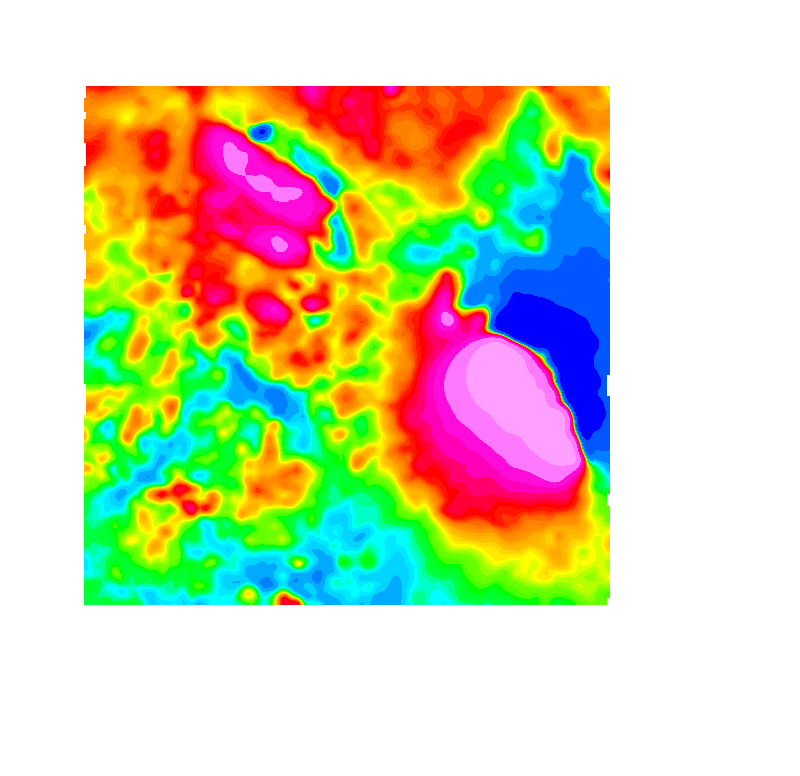

In [2]:
import geosoft.gxpy.gx as gx
import geosoft.gxpy.map as gxmap
import geosoft.gxpy.view as gxview
import geosoft.gxpy.group as gxgroup
import geosoft.gxpy.agg as gxagg
import geosoft.gxpy.grid as gxgrd
import geosoft.gxpy.viewer as gxviewer
 
gxc = gx.GXpy()

# get the grid extent and coordinate system from which we will create a default map named after the grid
# do this in a separate `with...` as the Aggregate_group class needs access to the grid file.
with gxgrd.Grid('Wittichica Creek Residual Total Field.grd') as grid:

    extent = grid.extent_2d()
    coordinate_system = grid.coordinate_system

    grid_file_name = grid.file_name
    map_file_name = grid_file_name + '.map'
    
# create a map for this grid on A4 media, scale to fit the extent
with gxmap.Map.new(map_file_name,
                   data_area=extent,
                   media="A4",
                   margins=(1, 3.5, 3, 1),
                   coordinate_system=coordinate_system,
                   overwrite=True) as gmap:
 
    # work with the data view
    with gxview.View.open(gmap, "data") as v:
        
        # add the grid image to the view
        with gxagg.Aggregate_image.new(grid_file_name) as agg:
            gxgroup.Aggregate_group.new(v, agg)
            
# display the map as an image
Image(gxmap.Map.open(map_file_name).image_file(pix_width=800))

## Add Contours and Shading

Now we will improve the script by adding contour lines and a shading effect.  We will also make a double-line outer-contour.

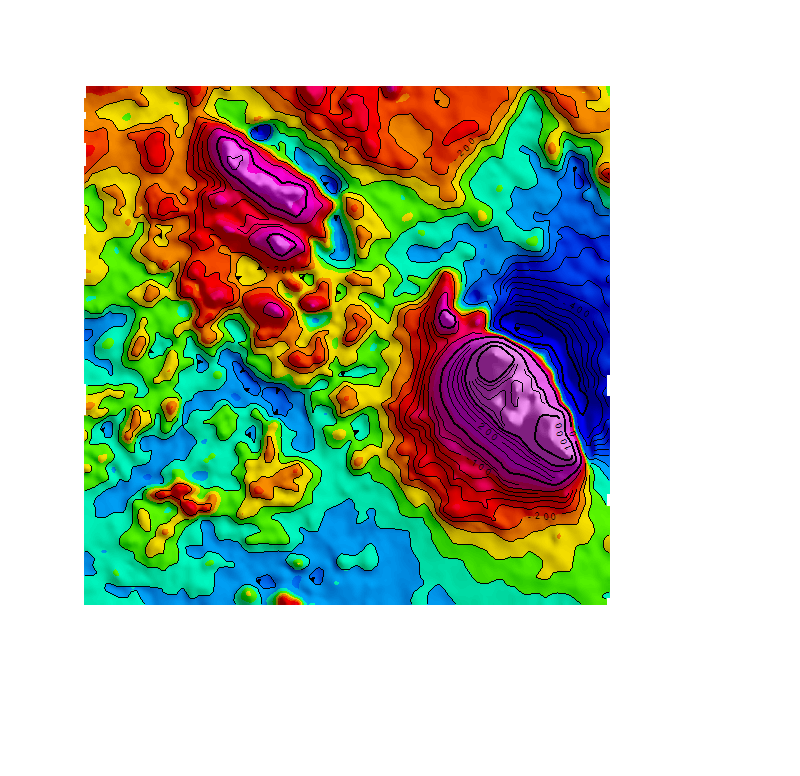

In [3]:
with gxmap.Map.new(map_file_name,
                   data_area=extent,
                   media="A4",
                   margins=(1, 3.5, 3, 1),
                   coordinate_system=coordinate_system,
                   overwrite=True) as gmap:
 
    # work with the data view, draw a line around the data view
    with gxview.View.open(gmap, "data") as v:
 
        # add the grid image to the view, with shading, 20 nT contour interval to match default contour lines
        with gxagg.Aggregate_image.new(grid_file_name, shade=True, contour=20) as agg:
            gxgroup.Aggregate_group.new(v, agg)
 
        # contour the grid
        gxgroup.contour(v, 'TMI_contour', grid_file_name)
        
# display the map as an image
Image(gxmap.Map.open(map_file_name).image_file(pix_width=800))

## Location Reference, Scale Bar, Colour Legend and Title

Now we will improve the map my adding location reference annotations, a scale bar, colour legend and map title.

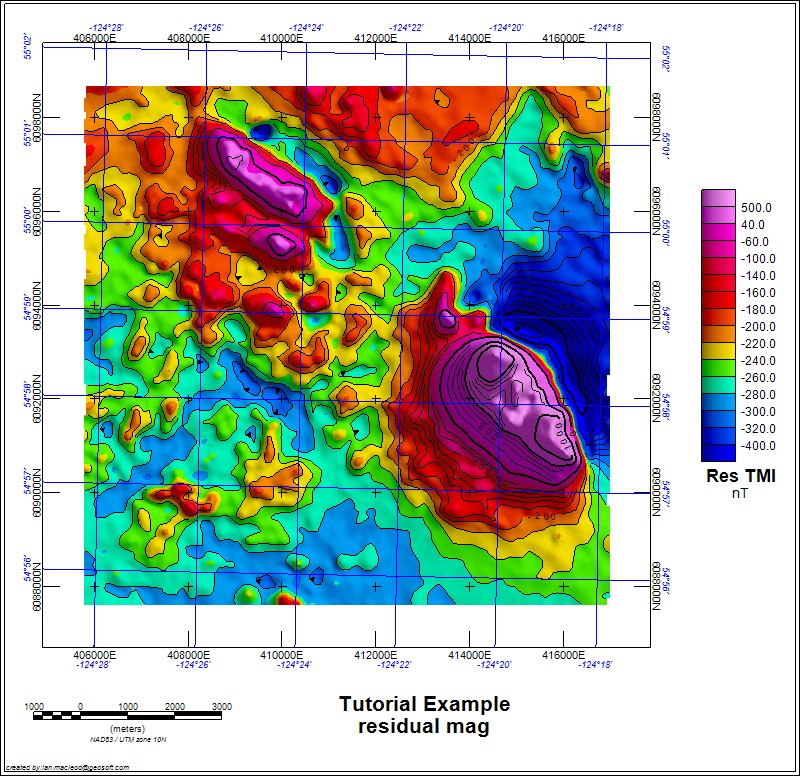

In [4]:
with gxmap.Map.new(map_file_name,
                   data_area=extent,
                   media="A4",
                   margins=(1, 3.5, 3, 1),
                   coordinate_system=coordinate_system,
                   overwrite=True) as gmap:
    
    # work with the data view, draw a line around the data view
    with gxview.View.open(gmap, "data") as v:
 
        # add the grid image to the view, with shading, 20 nT contour interval to match default contour lines
        with gxagg.Aggregate_image.new(grid_file_name, shade=True, contour=20) as agg:
            gxgroup.Aggregate_group.new(v, agg)
 
            # colour legend
            gxgroup.legend_color_bar(v, 'TMI_legend',
                                     title='Res TMI\nnT',
                                     location=(1.2,0),
                                     cmap=agg.layer_color_map(0),
                                     cmap2=agg.layer_color_map(1))
 
        # contour the grid
        gxgroup.contour(v, 'TMI_contour', grid_file_name)
 
    # map title and creator tag
    with gxview.View.open(gmap, "base") as v:
        with gxgroup.Draw(v, 'title') as g:
 
            g.text("Tutorial Example\nresidual mag",
                   reference=gxgroup.REF_BOTTOM_CENTER,
                   location=(100, 10),
                   text_def=gxgroup.Text_def(height=3.5,
                                             weight=gxgroup.FONT_WEIGHT_BOLD))
            g.text("created by:" + gxc.gid,
                   location=(1, 1.5),
                   text_def=gxgroup.Text_def(height=1.2,
                                             italics=True))
 
    # add a map surround to the map
    gmap.surround(outer_pen='kt500', inner_pen='kt100', gap=0.1)
 
    # annotate the data view locations
    gmap.annotate_data_xy(grid=gxmap.GRID_CROSSES)
    gmap.annotate_data_ll(grid=gxmap.GRID_LINES,
                          grid_pen=gxgroup.Pen(line_color='b'),
                          text_def=gxgroup.Text_def(color='b',
                                                    height=0.15,
                                                    italics=True))
    # scale bar
    gmap.scale_bar(location=(1, 3, 1.5),
                   text_def=gxgroup.Text_def(height=0.15))
    
# display the map as an image
Image(gxmap.Map.open(map_file_name).image_file(pix_width=800))

## Display in a Geosoft viewer

In [5]:
gxviewer.view_document(map_file_name, wait_for_close=False)